In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

In [3]:
from src.data_generator import *
from src.model import *
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X = SemiMartingale(X_0=1.0, vol='expou')

In [5]:
x = X.generate(1000, 100, theta=2.0, beta=2)
model = FFNetwork(n_layers = 5)

In [6]:
lossf = MomentLoss()

In [7]:
model._add_loss(lossf)

In [10]:
inc = x[:,-1] - x[:,0]
int_var = model(x)

In [13]:
model.loss(inc, int_var[0])

<tf.Tensor: id=297, shape=(), dtype=float64, numpy=61.888093995266914>

In [8]:
model.train(x, num_epochs=1, batch_size=10, lr=0.01)

TypeError: in converted code:

    ../src/model.py:145 train_step  *
        loss_value = self.loss(total_increment, int_var)
    ../src/model.py:33 __call__  *
        gaussian_moments = K.constant([gaussian_moment(p) for p in range(1, self.degree+1)])
    /home/phillipm/.local/lib/python3.7/site-packages/tensorflow_core/python/keras/backend.py:934 constant
        return constant_op.constant(value, dtype=dtype, shape=shape, name=name)
    /home/phillipm/.local/lib/python3.7/site-packages/tensorflow_core/python/framework/constant_op.py:227 constant
        allow_broadcast=True)
    /home/phillipm/.local/lib/python3.7/site-packages/tensorflow_core/python/framework/constant_op.py:265 _constant_impl
        allow_broadcast=allow_broadcast))
    /home/phillipm/.local/lib/python3.7/site-packages/tensorflow_core/python/framework/tensor_util.py:449 make_tensor_proto
        _AssertCompatible(values, dtype)
    /home/phillipm/.local/lib/python3.7/site-packages/tensorflow_core/python/framework/tensor_util.py:331 _AssertCompatible
        (dtype.name, repr(mismatch), type(mismatch).__name__))

    TypeError: Expected float64, got array(1.) of type 'ndarray' instead.


In [26]:
for step, x_batch in enumerate(tf.data.Dataset.from_tensor_slices(x).batch(20)):
    y = model(x_batch)
    print(y)
    print(step)

tf.Tensor(
[[0.31279763]
 [0.35330523]
 [1.61508631]
 [0.19348579]
 [0.27708621]
 [0.45248757]
 [0.43466038]
 [0.52874471]
 [0.5751915 ]
 [0.4925381 ]
 [0.35330674]
 [0.4918081 ]
 [0.14106213]
 [0.11169875]
 [0.39207594]
 [0.25716035]
 [0.15497599]
 [0.26730806]
 [0.31683192]
 [0.93650342]], shape=(20, 1), dtype=float64)
0
tf.Tensor(
[[0.29599589]
 [0.05830591]
 [0.45882467]
 [0.25793394]
 [0.58985555]
 [0.18333021]
 [0.17986634]
 [0.20186094]
 [0.1619043 ]
 [0.33824174]
 [0.25203805]
 [0.31699481]
 [0.22213793]
 [0.61680633]
 [0.35381296]
 [0.29529217]
 [0.5166124 ]
 [0.31633398]
 [0.20484634]
 [0.77092727]], shape=(20, 1), dtype=float64)
1
tf.Tensor(
[[0.18836443]
 [0.23334673]
 [0.2662623 ]
 [0.36769495]
 [0.24322941]
 [0.48282704]
 [0.24078262]
 [0.42569607]
 [0.21506015]
 [0.12990019]
 [0.38437429]
 [0.17666007]
 [0.43607782]
 [0.22182315]
 [0.23083646]
 [0.43043117]
 [1.12473246]
 [0.26337937]
 [0.19030482]
 [0.36491333]], shape=(20, 1), dtype=float64)
2
tf.Tensor(
[[0.28838584]


In [14]:
tf.data.Dataset.from_tensor_slices(x)[0]

TypeError: 'TensorSliceDataset' object is not subscriptable

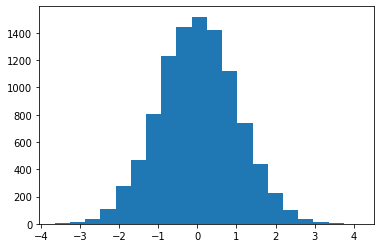

In [15]:
loss = MMDLoss()
x = X.get_total_increments()
sig = X.integrated_variance()
#loss(tf.constant(x), tf.constant(sig))
import matplotlib.pyplot as plt
plt.hist(x/np.sqrt(sig), bins=20)
plt.show()

In [24]:
model = FFNetwork(n_layers=3, h_dims=32)

[autoreload of src.model failed: Traceback (most recent call last):
  File "/home/phillipm/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/phillipm/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 450, in superreload
    update_generic(old_obj, new_obj)
  File "/home/phillipm/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 387, in update_generic
    update(a, b)
  File "/home/phillipm/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 342, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/home/phillipm/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 387, in update_generic
    update(a, b)
  File "/home/phillipm/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 266, in update_function
    setattr(old, name, getattr(new,

TypeError: super(type, obj): obj must be an instance or subtype of type

In [6]:
model = FFNetwork(n_layers =4)

In [7]:
model(x)

<tf.Tensor: id=136, shape=(1, 1), dtype=float64, numpy=array([[0.53113505]])>

In [8]:
model.summary()

Model: "ff_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  6528      
_________________________________________________________________
dense_1 (Dense)              multiple                  4160      
_________________________________________________________________
dense_2 (Dense)              multiple                  4160      
_________________________________________________________________
dense_3 (Dense)              multiple                  4160      
_________________________________________________________________
dense_4 (Dense)              multiple                  65        
Total params: 19,073
Trainable params: 19,073
Non-trainable params: 0
_________________________________________________________________


In [136]:
loss1 = MomentLoss(weights = None, degree=10)
loss2 = MomentLoss(weights = 'exponential', degree=10)
loss3 = MomentLoss(weights = 'factorial', degree=10)

In [137]:
print(loss1(inc, int_var))
print(loss2(inc, int_var))
print(loss3(inc, int_var))

tf.Tensor(1033.9674, shape=(), dtype=float32)
tf.Tensor(0.05526517, shape=(), dtype=float32)
tf.Tensor(0.00091985625, shape=(), dtype=float32)


In [171]:
loss = MMDLoss(kernel = 'rbf', length_scale=2.0)

In [172]:
loss.kernel(1.0, 2.0)

<tf.Tensor: shape=(), dtype=float32, numpy=0.7788008>